<a href="https://colab.research.google.com/github/HolyMuchii/ProcesamientoImagenesTPs/blob/main/TP2/TP_02_Murilo_Alves_Lima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 - 17/09/2021 - Murilo Alves Lima

* La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen. Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) y/o de IQ (para cambiar la saturación). Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.

Observaciones: para cada uno estos deben mostrar la imagen original vs el resultado de la modificación realizada a la imagen para un diferente rango de valores de prueba de Y e IQ.

* La segunda parte del TP2 consiste en utilizar algunos datasets 2D (pueden ser mapas de altitud, de temperatura, etc.) y “visualizarlos” con diferentes paletas, incluyendo la de niveles de gris y la arco iris.

Observaciones: el objetivo es ver cómo con diferentes paletas de colores se pueden apreciar ciertos detalles de una imagen, sin necesidad de modificar el contenido de la misma.

Importando a Imagem do Github

In [ ]:
!git clone https://github.com/HolyMuchii/ProcesamientoImagenesTPs.git

Cloning into 'ProcesamientoImagenesTPs'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


## RGB to YIQ

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import imageio as io

In [ ]:
image1 = Image.open("ProcesamientoImagenesTPs/IMG_0616.JPG")

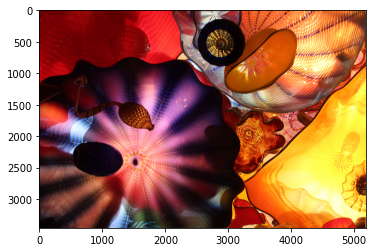

In [ ]:
plt.imshow(image1)

In [ ]:
print('Image Size:',image1.size,'   Image Format:',image1.format,'   Image Color Space:',image1.mode )

Image Size: (5184, 3456)    Image Format: JPEG    Image Color Space: RGB


In [ ]:
image1_array = np.array(image1)
print(image1_array)

[[[107   0   6]
  [106   0   5]
  [106   0   5]
  ...
  [147  51  11]
  [157  63  27]
  [153  61  24]]

 [[106   0   4]
  [105   0   3]
  [104   0   3]
  ...
  [152  60  19]
  [152  64  24]
  [150  65  24]]

 [[105   1   2]
  [104   0   1]
  [104   0   1]
  ...
  [151  67  23]
  [151  70  27]
  [149  70  27]]

 ...

 [[  5   4   2]
  [  4   3   1]
  [  3   2   0]
  ...
  [142  72  13]
  [142  67   9]
  [164  85  26]]

 [[  4   3   1]
  [  4   3   1]
  [  4   3   1]
  ...
  [144  74  15]
  [158  82  22]
  [164  86  24]]

 [[  4   3   1]
  [  3   2   0]
  [  4   3   1]
  ...
  [153  78  23]
  [167  89  27]
  [167  88  22]]]


In [ ]:
print('Image shape:',image1_array.shape)

Image shape: (3456, 5184, 3)


In [ ]:
YIQ = np.zeros(image1_array.shape)
print('YIQ shape:',YIQ.shape)

YIQ shape: (3456, 5184, 3)


In [ ]:
for i in range(image1_array.shape[0]):
  for j in range(image1_array.shape[1]):
    YIQ[i,j,0]=0.299*image1_array[i,j,0]+0.587*image1_array[i,j,1]+0.114*image1_array[i,j,2]
    YIQ[i,j,1]=0.595716*image1_array[i,j,0]+(-0.274453)*image1_array[i,j,1]+(-0.321263)*image1_array[i,j,2]
    YIQ[i,j,2]=0.211456*image1_array[i,j,0]+(-0.522591)*image1_array[i,j,1]+0.311135*image1_array[i,j,2]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[[ 32.677   ,  61.814034,  24.492602],
        [ 32.264   ,  61.539581,  23.970011],
        [ 32.264   ,  61.539581,  23.970011],
        ...,
        [ 75.144   ,  70.039256,   7.854376],
        [ 87.002   ,  67.562772,   8.676004],
        [ 84.29    ,  66.692603,   7.941957]],

       [[ 32.15    ,  61.860844,  23.658876],
        [ 31.737   ,  61.586391,  23.136285],
        [ 31.438   ,  60.990675,  22.924829],
        ...,
        [ 82.834   ,  67.977655,   6.697417],
        [ 85.752   ,  65.273528,   6.162728],
        [ 85.741   ,  63.807643,   5.217225]],

       [[ 32.21    ,  61.633201,  22.302559],
        [ 31.21    ,  61.633201,  22.302559],
        [ 31.21    ,  61.633201,  22.302559],
        ...,
        [ 87.1     ,  64.175716,   4.072364],
        [ 89.317   ,  62.067305,   3.749131],
        [ 88.719   ,  60.875873,   3.326219]],

       ...,

       [[  4.071   ,   1.238242,  -0.410814],
        [  3.071   ,   1.238242,  -0.410814],
        [  2.071   ,  

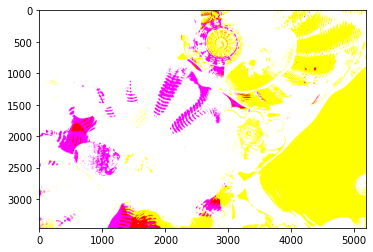

In [ ]:
plt.imshow(YIQ)

YIQ

In [ ]:
print('RGB pixel 500x500:',image1_array[500,500,],'   -     YIQ pixel 500x500:',YIQ[500,500,])
print('RGB Data type:',type(image1_array[500,500,0]),'   -     YIQ Data type:',type(YIQ[500,500,0]))


RGB pixel 500x500: [109   0   3]    -     YIQ pixel 500x500: [32.933    63.969255 23.982109]
RGB Data type: <class 'numpy.uint8'>    -     YIQ Data type: <class 'numpy.float64'>


In [ ]:
YIQ.shape[0]

3456

## Manipulating  -  Y I Q



In [ ]:
# Descomponer la imagen en sus compomentes RGB
def image_to_yiq(im):
  y = YIQ[:,:,0]
  i = YIQ[:,:,1]
  q = YIQ[:,:,2]
  return y, i, q

# Construir Imagen a partir de sus componentes RGB
def yiq_to_image(y,i,q):
  YIQ2 = np.zeros((YIQ.shape[0], YIQ.shape[1], 3))
  YIQ2[:,:,0] = y
  YIQ2[:,:,1] = i
  YIQ2[:,:,2] = q
  return YIQ2

In [ ]:
# Descomponemos la imagen en sus componentes YIQ
y, i, q = image_to_yiq(YIQ)

In [ ]:
RGB = np.zeros(YIQ2.shape)

[[22.8739 22.5848 22.5848 ... 52.6008 60.9014 59.003 ]
 [22.505  22.2159 22.0066 ... 57.9838 60.0264 60.0187]
 [22.547  21.847  21.847  ... 60.97   62.5219 62.1033]
 ...
 [ 2.8497  2.1497  1.4497 ... 60.3428 57.9691 71.3265]
 [ 2.1497  2.1497  2.1497 ... 61.7428 68.5188 71.5778]
 [ 2.1497  1.4497  2.1497 ... 65.9085 73.6778 72.8679]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


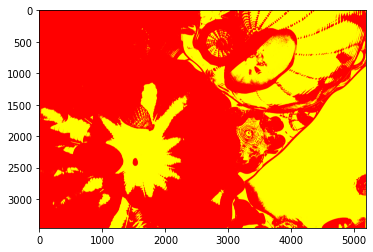

In [ ]:
#@title Alteración de los canales mediante un factor. { run: "auto" }

alpha = 0.7 #@param {type:"slider", min:0, max:1, step:0.1}
beta1 = 1.0043 #@param {type:"slider", min:-0.6, max:1.8, step:0.01}
beta2 = 1 #@param {type:"slider", min:-0.6, max:1.8, step:0.01}

y2 = np.clip(y * alpha, 0, 255)
i2 = np.clip(i * beta1, 0, 255)
q2 = np.clip(q * beta2, 0, 255)
print(y2)

YIQ2 = yiq_to_image(y2,i2,q2)

for i in range(YIQ2.shape[0]):
  for j in range(YIQ2.shape[1]):
    RGB[i,j,0]=1*YIQ2[i,j,0]+0.9663*YIQ2[i,j,1]+0.6210*YIQ2[i,j,2]
    RGB[i,j,1]=1*YIQ2[i,j,0]+(-0.2721)*YIQ2[i,j,1]+(-0.6474)*YIQ2[i,j,2]
    RGB[i,j,2]=1*YIQ2[i,j,0]+(-1.107)*YIQ2[i,j,1]+1.7046*YIQ2[i,j,2]

plt.imshow(RGB)


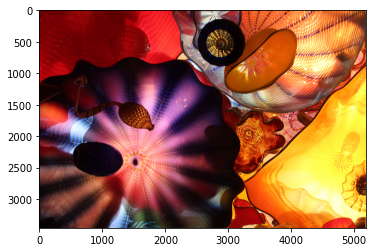

In [ ]:
plt.imshow(image1)

## La segunda parte del TP2 consiste en utilizar algunos datasets 2D (pueden ser mapas de altitud, de temperatura, etc.) y “visualizarlos” con diferentes paletas, incluyendo la de niveles de gris y la arco iris.

In [ ]:
import imageio as io

In [ ]:
# Función para leer una imagen y tenerla como Array numpy sin limitación uint8
def get_image(rute):
  im = io.imread(rute)
  im = im.astype(np.int)
  return im

In [ ]:
dog = 'https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41598-020-60439-y/MediaObjects/41598_2020_60439_Fig1_HTML.png?as=webp'

In [ ]:
im = get_image(dog)

ValueError: ignored

In [ ]:
# Plotear Imagen
def plot_image(im, title, cmap=None):
  fig, ax = plt.subplots(dpi=100)
  ax.imshow(im, cmap=cmap)
  ax.set_title(title)
  plt.axis('off')
  plt.show()

In [ ]:
image2_array = np.array(image2)

image2_array

array('https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41598-020-60439-y/MediaObjects/41598_2020_60439_Fig1_HTML.png?as=webp',
      dtype='<U146')

In [ ]:
plot_image(image2[:,:,0], 'gray', cmap='gray')

TypeError: ignored

## Análisis de los resultados:

* El código utilizado para transformar de RGB a YIQ y de YIQ a RGB requiere mucho tiempo. Sería interesante crear una función def de antemano para procesar los datos, tal vez
* Las imágenes convertidas no tenían valores de banda satisfactorios, algunas mostraban valores negativos
* No pude eliminar la imagen del perro para cambiar las paletas de colores.